In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from gensim import models
import nltk
import operator
import string
import seaborn as sns
import fasttext

In [2]:
Store = pd.read_csv('./csv/new_Label_Store_id.csv')

In [3]:
locality = pd.read_csv('./csv/locality new.csv')

In [4]:
retailer = pd.read_csv('./csv/true_retailer_id.csv')

In [5]:
Store.head()

,label,store_id,count
0,CARTE X3896 03/04 ABSOLU CAFE,b9e0021d-c007-44cc-b16c-7a46c5ec9f67,158
1,1403/SOLEREST 92 LEVALLOIS PERR,569bf309-e767-4055-9760-5453a5dee4d2,1025
2,FACTURE CARTE DU 180217 LISA LEVALLOIS PER CAR...,e8d64d2e-01fb-4347-87f5-88aecd66acdf,23
3,CHEZ VALERIE ST GILLES CROIX,b2e259ce-8368-4d05-b506-b4cbf23c8139,1
4,CB ABSOLU CAFE 17/09/17,b9e0021d-c007-44cc-b16c-7a46c5ec9f67,158


In [6]:
locality.head()

,label,store_id,customer_id,bank_id,locality,Count
0,FACTURE CARTE DU 040317 MAISON JANNEAU LES PON...,0004a4b1-9012-4e37-84d9-7961e879339c,2c2f7496-daef-476a-abef-4b5629a9f33b,d0a19b64-f13e-471d-88bf-0c7c87695cbc,les ponts-de-cé,5
1,FACTURE CARTE DU 120617 MAISON JANNEAU LES PON...,0004a4b1-9012-4e37-84d9-7961e879339c,2c2f7496-daef-476a-abef-4b5629a9f33b,d0a19b64-f13e-471d-88bf-0c7c87695cbc,les ponts-de-cé,5
2,UJA LA DEFENSEPUTEAUX LE 07 01 17,0006da1c-df0e-4d54-b4cd-6b2aad54c892,98e5c403-a2cd-48c0-8d90-0c74b11ad198,e505b092-269d-4691-8710-5bd25c8c1078,puteaux,5169
3,UJA LA DEFENSEPUTEAUX LE 22 04 17,0006da1c-df0e-4d54-b4cd-6b2aad54c892,98e5c403-a2cd-48c0-8d90-0c74b11ad198,e505b092-269d-4691-8710-5bd25c8c1078,puteaux,5169
4,JOUFFROY AUTO - PARIS,00087340-273a-4ba9-a16e-9a5250a7b0e0,871a3219-38ed-43cf-b96a-cd87c1ef1fd7,d972ace6-9ecb-4d2b-b0b1-d1131979d90a,paris,81044


In [7]:
retailer.head()

,id,transaction_date,amount,currency,label,type,customer_id,store_id,service_id,effective_date,retailer_id,true_retailer_id,Count
0,00eebaa4-af5d-40bb-ab26-6ae02aa35974,2017-12-07,-20.00,EUR,CB RETRAIT DU 07/12 LCL PARIS BROCHA,unknown,48e07ff8-f90c-46e2-b074-ad4a78254016,NaN,NaN,2017-12-08,5a718e55-cbb4-4063-94b3-339fef25bdcd,5a718e55-cbb4-4063-94b3-339fef25bdcd,2940
1,0128bead-9db9-4952-b4f1-22658338a2a4,2017-11-20,-60.00,EUR,CB RETRAIT DU 20/11 LCL LEVALLOIS PA,unknown,e5f2cacd-00f9-4fe3-b236-eacb1b233f13,NaN,NaN,2017-11-20,5a718e55-cbb4-4063-94b3-339fef25bdcd,5a718e55-cbb4-4063-94b3-339fef25bdcd,2940
2,015a3664-b69e-4eca-9789-7f3c44248373,2016-05-30,-40.00,EUR,Retrait automate RETRAIT DAB 270516 LCL LEVALL...,unknown,402f62ff-703b-48ff-b25a-caf0aa19778c,NaN,NaN,2016-05-30,5a718e55-cbb4-4063-94b3-339fef25bdcd,5a718e55-cbb4-4063-94b3-339fef25bdcd,2940
3,017f7b91-a1b8-45f6-8474-f43021433f62,2018-02-01,-1.48,EUR,ABONNEMENT LCL BANQUE EN LIGNE,unknown,4a2b6f14-f328-4d67-b1f1-7b19ea865fd4,NaN,NaN,2018-02-01,5a718e55-cbb4-4063-94b3-339fef25bdcd,5a718e55-cbb4-4063-94b3-339fef25bdcd,2940
4,034058b7-61e9-4069-b05f-2b566847c9e8,2016-11-07,-40.00,EUR,Retrait automate RETRAIT DAB 051116 LCL PARIS ...,unknown,10efd567-175a-4d99-9191-69f8fef3a4a1,NaN,NaN,2016-11-07,5a718e55-cbb4-4063-94b3-339fef25bdcd,5a718e55-cbb4-4063-94b3-339fef25bdcd,2940


Text(0.5,0,'Количество строк')

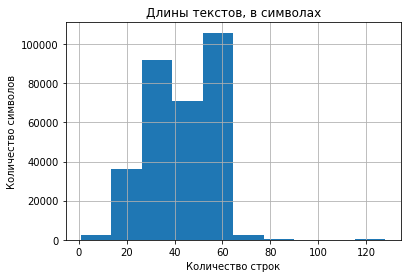

In [4]:
word_len = Store.label.str.len()

word_len.hist()
plt.title('Длины текстов, в символах')
plt.ylabel('Количество символов')
plt.xlabel('Количество строк')

In [9]:
words = []
for i in range(len(Store)):
    for j in Store.label.iloc[i].split():
        words.append(j)

In [15]:
freq = nltk.FreqDist(words)

In [22]:
sorted(freq.items(), key = operator.itemgetter(1), reverse=True)[:10]

[('CARTE', 214614),
 ('CB', 81834),
 ('DU', 71110),
 ('FACTURE', 63523),
 ('PAIEMENT', 42777),
 ('LEVALLOIS', 38745),
 ('PARIS', 35211),
 ('Carte', 33634),
 ('Par', 26537),
 ('Paiement', 26530)]

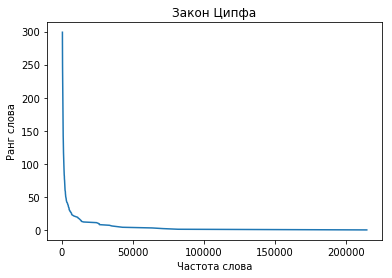

In [23]:
freq = list(freq.values())
freq = sorted(freq, reverse = True)
plt.plot(freq[:300], range(300))
plt.title('Закон Ципфа')
plt.ylabel('Ранг слова')
plt.xlabel('Частота слова')
plt.show()

Text(0.5,0,'Количество строк')

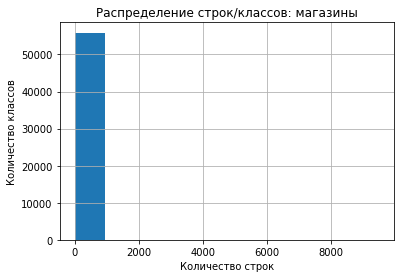

In [24]:
df_ = pd.value_counts(Store.store_id)

df_.hist()
plt.title('Распределение строк/классов: магазины')
plt.ylabel('Количество классов')
plt.xlabel('Количество строк')

Text(0.5,0,'Количество строк >=10')

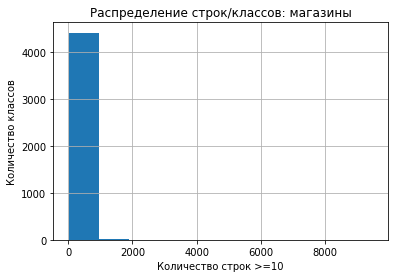

In [25]:
df_1 = df_[df_ >=10]

df_1.hist()
plt.title('Распределение строк/классов: магазины')
plt.ylabel('Количество классов')
plt.xlabel('Количество строк >=10')

Text(0.5,0,'Количество строк')

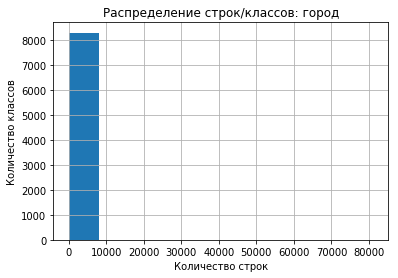

In [32]:
df_ = pd.value_counts(locality.locality)

df_.hist()
plt.title('Распределение строк/классов: город')
plt.ylabel('Количество классов')
plt.xlabel('Количество строк')

Text(0.5,0,'Количество строк >=10')

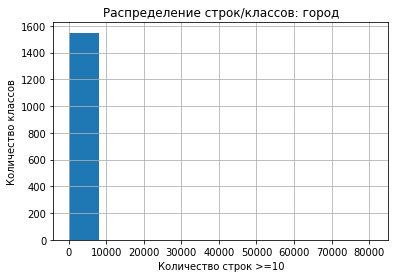

In [33]:
df_1 = df_[df_ >=10]

df_1.hist()
plt.title('Распределение строк/классов: город')
plt.ylabel('Количество классов')
plt.xlabel('Количество строк >=10')

Text(0.5,0,'Количество строк')

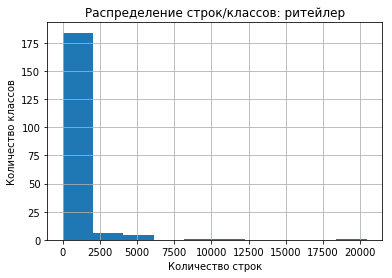

In [36]:
df1 = pd.value_counts(retailer.true_retailer_id)

df1.hist()
plt.title('Распределение строк/классов: ритейлер')
plt.ylabel('Количество классов')
plt.xlabel('Количество строк')

Text(0.5,0,'Количество строк >=10')

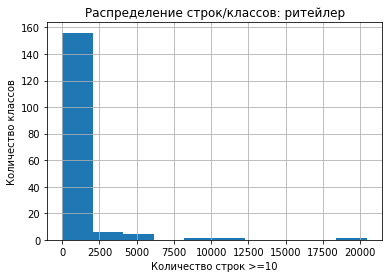

In [37]:
df3 = df1[df1 >=10]

df3.hist()
plt.title('Распределение строк/классов: ритейлер')
plt.ylabel('Количество классов')
plt.xlabel('Количество строк >=10')

In [8]:
df2 = retailer[(retailer['Count'] >= 1100)&(retailer['Count'] <= 2000)]
len(df2.true_retailer_id.unique())

10

In [9]:
le = LabelEncoder()
df2['true_retailer_id'] = le.fit_transform(df2.true_retailer_id)

/home/asus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [69]:
vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5) 

fit_corpCV = vectCV.fit_transform(df2.label)

In [73]:
train, test, y_train, y_test = train_test_split(fit_corpCV, df2.true_retailer_id, test_size = 0.2, random_state = 42)

In [74]:
lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)

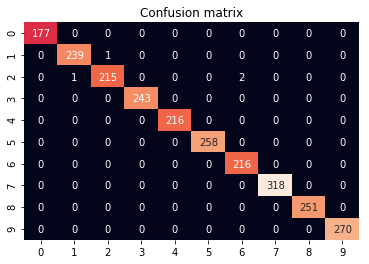

In [95]:
labels = sorted(y_test.unique())

sns.heatmap(data= metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

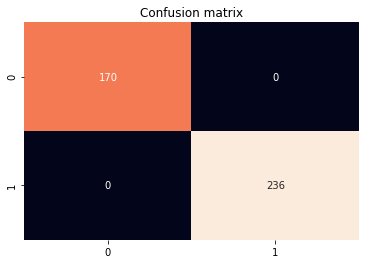

In [96]:
df3 = df2[(df2['true_retailer_id'] == 0)|(df2['true_retailer_id'] == 1)]

vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)

fit_corpCV = vectCV.fit_transform(df3.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, df3.true_retailer_id, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)

labels = sorted(y_test.unique())

sns.heatmap(data= metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

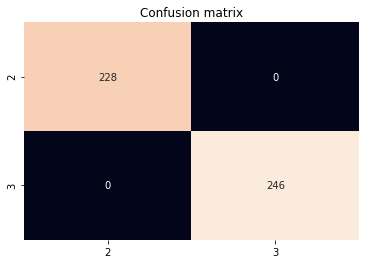

In [97]:
df3 = df2[(df2['true_retailer_id'] == 2)|(df2['true_retailer_id'] == 3)]

vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)

fit_corpCV = vectCV.fit_transform(df3.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, df3.true_retailer_id, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)

labels = sorted(y_test.unique())

sns.heatmap(data= metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

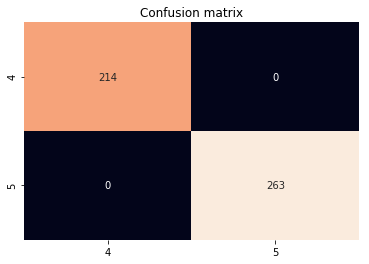

In [98]:
df3 = df2[(df2['true_retailer_id'] == 4)|(df2['true_retailer_id'] == 5)]

vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)

fit_corpCV = vectCV.fit_transform(df3.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, df3.true_retailer_id, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)

labels = sorted(y_test.unique())

sns.heatmap(data= metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

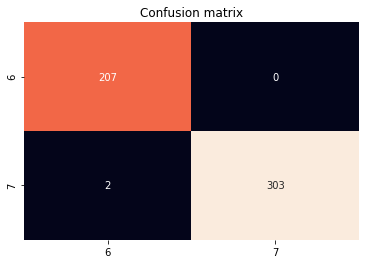

In [99]:
df3 = df2[(df2['true_retailer_id'] == 6)|(df2['true_retailer_id'] == 7)]

vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)

fit_corpCV = vectCV.fit_transform(df3.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, df3.true_retailer_id, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)

labels = sorted(y_test.unique())

sns.heatmap(data= metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

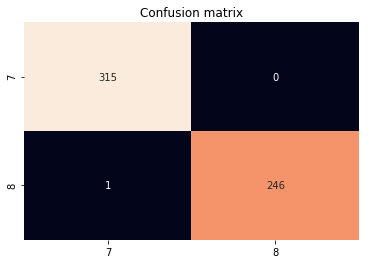

In [100]:
df3 = df2[(df2['true_retailer_id'] == 7)|(df2['true_retailer_id'] == 8)]

vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)

fit_corpCV = vectCV.fit_transform(df3.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, df3.true_retailer_id, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)

labels = sorted(y_test.unique())

sns.heatmap(data= metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

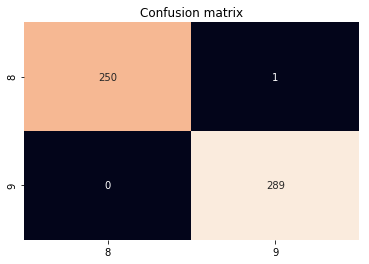

In [101]:
df3 = df2[(df2['true_retailer_id'] == 8)|(df2['true_retailer_id'] == 9)]

vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)

fit_corpCV = vectCV.fit_transform(df3.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, df3.true_retailer_id, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(train, y_train)
y_pred = lr.predict(test)

labels = sorted(y_test.unique())

sns.heatmap(data= metrics.confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [10]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(w2v.popitem()[1])

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

## Locality

In [11]:
locality= locality[locality['Count'] >= 10]

Logistic regression + CountVectorize

In [24]:
vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5) 

fit_corpCV = vectCV.fit_transform(locality.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, locality.locality, test_size = 0.25, random_state = 42)

lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)

y_pred = lr.predict(test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8433
Recall: 0.8399
F1-measure: 0.8381
Accuracy: 0.8399


Logistic regression + TF-IDF

In [25]:
vectTF = TfidfVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)
fit_corpTF = vectTF.fit_transform(locality.label)
train, test, y_train, y_test = train_test_split(fit_corpTF, locality.locality, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8324
Recall: 0.8275
F1-measure: 0.8206
Accuracy: 0.8275


LR CV (текст приведен к нижнему регистру)

In [26]:
vectCV = CountVectorizer(lowercase = True, ngram_range=(1, 3), min_df=5) 
fit_corpCV = vectCV.fit_transform(locality.label)
train, test, y_train, y_test = train_test_split(fit_corpCV, locality.locality, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.4663
Recall: 0.4542
F1-measure: 0.4655
Accuracy: 0.4542


Logistic regression + TF-IDF (текст приведен к нижнему регистру)

In [27]:
vectTF = TfidfVectorizer(lowercase = True, ngram_range=(1, 3), min_df=5)
fit_corpTF = vectTF.fit_transform(locality.label)
train, test, y_train, y_test = train_test_split(fit_corpTF, locality.locality, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.4572
Recall: 0.4540
F1-measure: 0.4548
Accuracy: 0.4540


In [14]:
#удаление знаков пунктуации
strip = string.whitespace + string.punctuation  + "\"'"

def words_only(text):
    q1 = ''
    for d1 in text.split():
        q1 = q1 +' '+ d1.strip(strip)
    return q1


In [29]:
df2 = locality.copy()
df2['label'] = locality.label.apply(words_only)
df2 = df2.drop_duplicates()

Logistic regression + CountVectorize удалены знаки пунктуации

In [30]:
vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5) 

fit_corpCV = vectCV.fit_transform(df2.label)
train, test, y_train, y_test = train_test_split(fit_corpCV, df2.locality, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8662
Recall: 0.8654
F1-measure: 0.8656
Accuracy: 0.8654


Logistic regression + TF-IDF удалены знаки пунктуации

In [31]:
vectTF = TfidfVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)
fit_corpTF = vectTF.fit_transform(df2.label)
train, test, y_train, y_test = train_test_split(fit_corpTF, df2.locality, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8568
Recall: 0.8551
F1-measure: 0.8455
Accuracy: 0.8551


Word2Vec+Random Forest

In [32]:
texts = [locality.label.iloc[i].split() for i in range(len(locality))]
texts[0]

['UJA', 'LA', 'DEFENSEPUTEAUX', 'LE', '07', '01', '17']

In [33]:
model = models.Word2Vec(texts, size= 300, window= 1, min_count= 2, sg= 0)
model.init_sims(replace = True)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

X_train, X_test, y_train, y_test = train_test_split(locality.label, locality.locality, test_size=0.25)

rfc_w2v.fit(X_train, y_train)
pred = rfc_w2v.predict(X_test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9100
Recall: 0.9032
F1-measure: 0.9042
Accuracy: 0.9032


Word2Vec+Random Forest (удалены знаки пунктуации)

In [34]:
texts = [df2.label.iloc[i].split() for i in range(len(df2))]
model = models.Word2Vec(texts, size= 300, window= 1, min_count= 2, sg= 0)
model.init_sims(replace = True)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

X_train, X_test, y_train, y_test = train_test_split(df2.label, df2.locality, test_size=0.25)

rfc_w2v.fit(X_train, y_train)
pred = rfc_w2v.predict(X_test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9233
Recall: 0.9199
F1-measure: 0.9183
Accuracy: 0.9199


FastText

In [35]:
train, test = train_test_split(locality, test_size = 0.25, random_state = 42)

In [36]:
with open('./models/data1.train.txt', 'w+') as outfile:
    for index, row in train.iterrows():
        outfile.write('__label__' + str(row['locality']) + ' '+ row['label'] + '\n')

In [37]:
with open('./models/test.txt', 'w+') as outfile:
    for index, row in test.iterrows():
        outfile.write('__label__' + str(row['locality']) + ' '+ row['label'] + '\n')

In [38]:
classifier = fasttext.supervised('./models/data1.train.txt', 'model')
result = classifier.test('./models/test.txt')
pred1 = classifier.predict(test.label)
pred = np.array(pred1)
y_test = test.locality
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9367
Recall: 0.9345
F1-measure: 0.9350
Accuracy: 0.9345


FastText (удалены знаки пунктуации)

In [39]:
train, test = train_test_split(df2, test_size = 0.25, random_state = 42)

with open('./models/data1.train.txt', 'w+') as outfile:
    for index, row in train.iterrows():
        outfile.write('__label__' + str(row['locality']) + ' '+ row['label'] + '\n')

with open('./models/test.txt', 'w+') as outfile:
    for index, row in test.iterrows():
        outfile.write('__label__' + str(row['locality']) + ' '+ row['label'] + '\n')

classifier = fasttext.supervised('./models/data1.train.txt', 'model')
result = classifier.test('./models/test.txt')
pred1 = classifier.predict(test.label)
pred = np.array(pred1)
y_test = test.locality
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9561
Recall: 0.9542
F1-measure: 0.9548
Accuracy: 0.9542


## Retailer

In [40]:
retailer = retailer[retailer['Count'] >= 10]

Logistic regression + CountVectorize

In [41]:
vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5) 

fit_corpCV = vectCV.fit_transform(retailer.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, retailer.true_retailer_id, test_size = 0.25, random_state = 42)

lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8965
Recall: 0.8961
F1-measure: 0.8836
Accuracy: 0.8961


Logistic regression + TF-IDF

In [42]:
vectTF = TfidfVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)
fit_corpTF = vectTF.fit_transform(retailer.label)
train, test, y_train, y_test = train_test_split(fit_corpTF, retailer.true_retailer_id, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8826
Recall: 0.8812
F1-measure: 0.8741
Accuracy: 0.8812


In [43]:
df2 = retailer.copy()
df2['label'] = retailer.label.apply(words_only)
df2 = df2.drop_duplicates()

Logistic regression + CountVectorize удалены знаки пунктуации

In [44]:
vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5) 

fit_corpCV = vectCV.fit_transform(df2.label)
train, test, y_train, y_test = train_test_split(fit_corpCV, df2.true_retailer_id, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.9011
Recall: 0.8936
F1-measure: 0.9037
Accuracy: 0.8936


Word2Vec+Random Forest

In [45]:
texts = [retailer.label.iloc[i].split() for i in range(len(retailer))]
texts[0]

['CB', 'RETRAIT', 'DU', '07/12', 'LCL', 'PARIS', 'BROCHA']

In [46]:
model = models.Word2Vec(texts, size= 300, window= 1, min_count= 2, sg= 0)
model.init_sims(replace = True)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

X_train, X_test, y_train, y_test = train_test_split(retailer.label, retailer.true_retailer_id, test_size=0.25)

rfc_w2v.fit(X_train, y_train)
pred = rfc_w2v.predict(X_test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9304
Recall: 0.9330
F1-measure: 0.9325
Accuracy: 0.9330


Word2Vec+Random Forest (удалены знаки пунктуации)

In [47]:
texts = [df2.label.iloc[i].split() for i in range(len(df2))]
model = models.Word2Vec(texts, size= 300, window= 1, min_count= 2, sg= 0)
model.init_sims(replace = True)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier())])

X_train, X_test, y_train, y_test = train_test_split(df2.label, df2.true_retailer_id, test_size=0.25)

rfc_w2v.fit(X_train, y_train)
pred = rfc_w2v.predict(X_test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9427
Recall: 0.9417
F1-measure: 0.9387
Accuracy: 0.9417


FastText

In [48]:
train, test = train_test_split(retailer, test_size = 0.25, random_state = 42)

with open('./models/data1.train.txt', 'w+') as outfile:
    for index, row in train.iterrows():
        outfile.write('__label__' + str(row['true_retailer_id']) + ' '+ row['label'] + '\n')

with open('./models/test.txt', 'w+') as outfile:
    for index, row in test.iterrows():
        outfile.write('__label__' + str(row['true_retailer_id']) + ' '+ row['label'] + '\n')

classifier = fasttext.supervised('./models/data1.train.txt', 'model')
result = classifier.test('./models/test.txt')
pred1 = classifier.predict(test.label)
pred = np.array(pred1)
y_test = test.true_retailer_id
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9571
Recall: 0.9452
F1-measure: 0.9515
Accuracy: 0.9452


FastText (удалены знаки пунктуации)

In [49]:
train, test = train_test_split(df2, test_size = 0.25, random_state = 42)

with open('./models/data1.train.txt', 'w+') as outfile:
    for index, row in train.iterrows():
        outfile.write('__label__' + str(row['true_retailer_id']) + ' '+ row['label'] + '\n')

with open('./models/test.txt', 'w+') as outfile:
    for index, row in test.iterrows():
        outfile.write('__label__' + str(row['true_retailer_id']) + ' '+ row['label'] + '\n')

classifier = fasttext.supervised('./models/data1.train.txt', 'model')
result = classifier.test('./models/test.txt')
pred1 = classifier.predict(test.label)
pred = np.array(pred1)
y_test = test.true_retailer_id
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9613
Recall: 0.9538
F1-measure: 0.9607
Accuracy: 0.9538


## Store

In [51]:
Store = Store[Store['count'] >= 10]

Logistic regression + CountVectorize

In [52]:
vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5) 

fit_corpCV = vectCV.fit_transform(Store.label)

train, test, y_train, y_test = train_test_split(fit_corpCV, Store.store_id, test_size = 0.25, random_state = 42)

lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8213
Recall: 0.8195
F1-measure: 0.8174
Accuracy: 0.8195


Logistic regression + TF-IDF

In [53]:
vectTF = TfidfVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5)
fit_corpTF = vectTF.fit_transform(Store.label)
train, test, y_train, y_test = train_test_split(fit_corpTF, Store.store_id, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8172
Recall: 0.8054
F1-measure: 0.8126
Accuracy: 0.8054


In [54]:
df2 = Store.copy()
df2['label'] = Store.label.apply(words_only)
df2 = df2.drop_duplicates()

Logistic regression + CountVectorize удалены знаки пунктуации

In [55]:
vectCV = CountVectorizer(lowercase = False, ngram_range=(1, 3), min_df=5) 

fit_corpCV = vectCV.fit_transform(df2.label)
train, test, y_train, y_test = train_test_split(fit_corpCV, df2.store_id, test_size = 0.25, random_state = 42)
lr = LogisticRegression(solver= 'lbfgs', multi_class= 'multinomial')
lr.fit(train, y_train)
y_pred = lr.predict(test)
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, y_pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, y_pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Precision: 0.8320
Recall: 0.8211
F1-measure: 0.8272
Accuracy: 0.8211


Word2Vec+Random Forest

In [56]:
texts = [Store.label.iloc[i].split() for i in range(len(Store))]
texts[0]

['CARTE', 'X3896', '03/04', 'ABSOLU', 'CAFE']

In [57]:
model = models.Word2Vec(texts, size= 300, window= 1, min_count= 2, sg= 0)
model.init_sims(replace = True)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

X_train, X_test, y_train, y_test = train_test_split(Store.label, Store.store_id, test_size=0.25)

rfc_w2v.fit(X_train, y_train)
pred = rfc_w2v.predict(X_test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.8845
Recall: 0.8734
F1-measure: 0.8727
Accuracy: 0.8734


Word2Vec+Random Forest (удалены знаки пунктуации)

In [58]:
texts = [df2.label.iloc[i].split() for i in range(len(df2))]
model = models.Word2Vec(texts, size= 300, window= 1, min_count= 2, sg= 0)
model.init_sims(replace = True)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

rfc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", RandomForestClassifier(n_estimators=20))])

X_train, X_test, y_train, y_test = train_test_split(df2.label, df2.store_id, test_size=0.25)

rfc_w2v.fit(X_train, y_train)
pred = rfc_w2v.predict(X_test)

print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.8962
Recall: 0.8840
F1-measure: 0.8873
Accuracy: 0.8840


FastText

In [59]:
train, test = train_test_split(Store, test_size = 0.25, random_state = 42)

with open('./models/data1.train.txt', 'w+') as outfile:
    for index, row in train.iterrows():
        outfile.write('__label__' + str(row['store_id']) + ' '+ row['label'] + '\n')

with open('./models/test.txt', 'w+') as outfile:
    for index, row in test.iterrows():
        outfile.write('__label__' + str(row['store_id']) + ' '+ row['label'] + '\n')

classifier = fasttext.supervised('./models/data1.train.txt', 'model')
result = classifier.test('./models/test.txt')
pred1 = classifier.predict(test.label)
pred = np.array(pred1)
y_test = test.store_id
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.8997
Recall: 0.8938
F1-measure: 0.8944
Accuracy: 0.8938


FastText (удалены знаки пунктуации)

In [60]:
train, test = train_test_split(df2, test_size = 0.25, random_state = 42)

with open('./models/data1.train.txt', 'w+') as outfile:
    for index, row in train.iterrows():
        outfile.write('__label__' + str(row['store_id']) + ' '+ row['label'] + '\n')

with open('./models/test.txt', 'w+') as outfile:
    for index, row in test.iterrows():
        outfile.write('__label__' + str(row['store_id']) + ' '+ row['label'] + '\n')

classifier = fasttext.supervised('./models/data1.train.txt', 'model')
result = classifier.test('./models/test.txt')
pred1 = classifier.predict(test.label)
pred = np.array(pred1)
y_test = test.store_id
print("Precision: {0:6.4f}".format(metrics.precision_score(y_test, pred, average='weighted')))
print("Recall: {0:6.4f}".format(metrics.recall_score(y_test, pred, average='weighted')))
print("F1-measure: {0:6.4f}".format(metrics.f1_score(y_test, pred, average='weighted')))
print("Accuracy: {0:6.4f}".format(metrics.accuracy_score(y_test, pred)))

Precision: 0.9100
Recall: 0.9032
F1-measure: 0.9042
Accuracy: 0.9032
